In [1]:
import pandas as pd
import os,sys, imp
sys.path.append('./src/')
import doc_utils_clean as doc_utils
import feature_utils
import defines
import numpy as np
from sklearn_crfsuite import scorers, CRF
from sklearn_crfsuite import metrics
from sklearn_crfsuite.metrics import flat_classification_report
from sklearn.model_selection import LeaveOneGroupOut,LeavePGroupsOut,GroupKFold

from operator import itemgetter
from sklearn_crfsuite.utils import flatten
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import random
import model_utils
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
imp.reload(doc_utils)
doc_utils.parse_all_docs()
doc_db =  pd.read_csv("./dataframes/doc_db.csv")
doc_db.sort_values(by='doc_idx_from_name',inplace=True)
doc_db

Creating doc_db
ERROR: file /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/./tmp/long_sent does not exists
1 Doc 621 sentences saved
Finished doc 0 of 80
2 Doc 817 sentences saved
Finished doc 1 of 80
3 Doc 705 sentences saved
Finished doc 2 of 80
4 Doc 549 sentences saved
Finished doc 3 of 80
5 Doc 567 sentences saved
Finished doc 4 of 80
6 Doc 998 sentences saved
Finished doc 5 of 80
7 Doc 480 sentences saved
Finished doc 6 of 80
8 Doc 407 sentences saved
Finished doc 7 of 80
9 Doc 719 sentences saved
Finished doc 8 of 80
10 Doc 423 sentences saved
Finished doc 9 of 80
11 Doc 1001 sentences saved
Finished doc 10 of 80
12 Doc 880 sentences saved
Finished doc 11 of 80
13 Doc 887 sentences saved
Finished doc 12 of 80
14 Doc 814 sentences saved
Finished doc 13 of 80
15 Doc 829 sentences saved
Finished doc 14 of 80
16 Doc 436 sentences saved
Finished doc 15 of 80
17 Doc 580 sentences saved
Finished doc 16 of 80
18 Doc 149 sentences saved
Finished doc 17 of 80
19 Doc 36

,path,file_name,doc_idx_from_name,par_count,sent_count,nar_sent_count
0,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,01_aingimel3_lc.docx,1,205.000000,621.000000,270.000000
1,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,02_aingimel12_lc.docx,2,157.000000,817.000000,100.000000
2,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,03_aingimel26_lc.docx,3,118.000000,705.000000,131.000000
3,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,04_nun2_lc.docx,4,132.000000,549.000000,201.000000
4,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,05_kafhey_23_lc.docx,5,65.000000,567.000000,299.000000
...,...,...,...,...,...,...
75,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,76_nun2_Mor.docx,76,132.000000,556.000000,191.000000
76,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,77_nun25_Mor.docx,77,176.000000,461.000000,70.000000
77,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,78_tsadek27_Mor.docx,78,122.000000,196.000000,50.000000
78,/scratch/sim_reg6/users/zsofya/classroom/MSc/p...,79_tsadek29_Mor.docx,79,173.000000,289.000000,78.000000


### Flow:
- Save doc names/statistic
- Parse doc
- Calculate POS
- Calculate vectors
- Calculate similarity
- Save docs' features
- Proceed paragraphs (split long)
- Pask features to dictionary per doc/ per paragraph


In [3]:
imp.reload(doc_utils)
imp.reload(defines)
imp.reload(feature_utils)
doc_utils.parse_all_docs()

ft = feature_utils.load_fasstex_model()

for doc_idx in doc_db['doc_idx_from_name'].values:  
    feature_utils.save_doc_features(int(doc_idx),ft)

Creating doc_db
ERROR: file /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/./tmp/long_sent does not exists
1 Doc 621 sentences saved
Finished doc 0 of 80
2 Doc 817 sentences saved
Finished doc 1 of 80
3 Doc 705 sentences saved
Finished doc 2 of 80
4 Doc 549 sentences saved
Finished doc 3 of 80
5 Doc 567 sentences saved
Finished doc 4 of 80
6 Doc 998 sentences saved
Finished doc 5 of 80
7 Doc 480 sentences saved
Finished doc 6 of 80
8 Doc 407 sentences saved
Finished doc 7 of 80
9 Doc 719 sentences saved
Finished doc 8 of 80
10 Doc 423 sentences saved
Finished doc 9 of 80
11 Doc 1001 sentences saved
Finished doc 10 of 80
12 Doc 880 sentences saved
Finished doc 11 of 80
13 Doc 887 sentences saved
Finished doc 12 of 80
14 Doc 814 sentences saved
Finished doc 13 of 80
15 Doc 829 sentences saved
Finished doc 14 of 80
16 Doc 436 sentences saved
Finished doc 15 of 80
17 Doc 580 sentences saved
Finished doc 16 of 80
18 Doc 149 sentences saved
Finished doc 17 of 80
19 Doc 36

39 sim_db sent saved
40 sent lemma db saved
40 sent count db saved
40 sent features db saved
40 doc sent saved
40 sim_db sent saved
41 sent lemma db saved
41 sent count db saved
41 sent features db saved
41 doc sent saved
41 sim_db sent saved
42 sent lemma db saved
42 sent count db saved
42 sent features db saved
42 doc sent saved
42 sim_db sent saved
43 sent lemma db saved
43 sent count db saved
43 sent features db saved
43 doc sent saved
43 sim_db sent saved
44 sent lemma db saved
44 sent count db saved
44 sent features db saved
44 doc sent saved
44 sim_db sent saved
45 sent lemma db saved
45 sent count db saved
45 sent features db saved
45 doc sent saved
45 sim_db sent saved
46 sent lemma db saved
46 sent count db saved
46 sent features db saved
46 doc sent saved
46 sim_db sent saved
47 sent lemma db saved
47 sent count db saved
47 sent features db saved
47 doc sent saved
47 sim_db sent saved
48 sent lemma db saved
48 sent count db saved
48 sent features db saved
48 doc sent saved
4

In [5]:
imp.reload(feature_utils)
docs_map = feature_utils.pack_all_doc_sentences_to_map(per_par=False,limit=0,sent_lemma_db_list=[])

4 doc 460 sentences packed
11 doc 736 sentences packed
30 doc 356 sentences packed
25 doc 355 sentences packed
58 doc 572 sentences packed
72 doc 813 sentences packed
67 doc 810 sentences packed
46 doc 264 sentences packed
53 doc 369 sentences packed
79 doc 252 sentences packed
40 doc 221 sentences packed
55 doc 344 sentences packed
74 doc 425 sentences packed
61 doc 637 sentences packed
9 doc 565 sentences packed
36 doc 158 sentences packed
23 doc 294 sentences packed
2 doc 632 sentences packed
17 doc 533 sentences packed
28 doc 559 sentences packed
80 doc 491 sentences packed
31 doc 339 sentences packed
24 doc 501 sentences packed
5 doc 510 sentences packed
10 doc 400 sentences packed
78 doc 178 sentences packed
47 doc 204 sentences packed
52 doc 571 sentences packed
73 doc 395 sentences packed
66 doc 777 sentences packed
59 doc 652 sentences packed
75 doc 317 sentences packed
60 doc 432 sentences packed
41 doc 208 sentences packed
54 doc 505 sentences packed
29 doc 497 sentences pac

In [76]:
docs_map[23]['X'][12]

[{'par_idx_in_doc': 12.0,
  'sent_len': 10.0,
  'is_client': 0,
  'sent_idx_in_par': 0,
  'TOKEN': 7,
  'POSTAG_CONJ': 0.2857142857142857,
  'POSTAG_IN': 0.1428571428571428,
  'POSTAG_NNT': 0.1428571428571428,
  'POSTAG_PREPOSITION': 0.1428571428571428,
  'POSTAG_RB': 0.5714285714285714,
  'POSTAG_S_PRN': 0.1428571428571428,
  'POSTAG_VB': 0.1428571428571428,
  'f_gen_F': 0.1428571428571428,
  'f_gen_M': 0.1428571428571428,
  'f_num_P': 0.1428571428571428,
  'f_num_S': 0.1428571428571428,
  'f_per_3': 0.1428571428571428,
  'tfidf_word_4968': 0.165866150262045,
  'tfidf_word_4469': 0.6213653717663224,
  'tfidf_word_2377': 0.2965181490203456,
  'tfidf_word_1714': 0.48917002717023766,
  'tfidf_word_422': 0.4539338196524986,
  'tfidf_word_405': 0.23049350134539281,
  'tfidf_char_wb_22616': 0.2695941766838068,
  'tfidf_char_wb_22615': 0.24754200735544454,
  'tfidf_char_wb_22613': 0.18356990498054265,
  'tfidf_char_wb_21906': 0.10134034894274299,
  'tfidf_char_wb_21859': 0.19115250594489697,

### Smart paragraph pack

### Run single example - sequence = 3x paragraph [1:3][4:6]...

In [19]:
imp.reload(feature_utils)
seq_len=8
step=8
feature_utils.reshape_docs_map_to_seq(docs_map,False,seq_len,step)

doc sentences reshaped: from 460 to 58
doc sentences reshaped: from 736 to 92
doc sentences reshaped: from 356 to 45
doc sentences reshaped: from 355 to 45
doc sentences reshaped: from 572 to 72
doc sentences reshaped: from 813 to 102
doc sentences reshaped: from 810 to 102
doc sentences reshaped: from 264 to 33
doc sentences reshaped: from 369 to 47
doc sentences reshaped: from 252 to 32
doc sentences reshaped: from 221 to 28
doc sentences reshaped: from 344 to 43
doc sentences reshaped: from 425 to 54
doc sentences reshaped: from 637 to 80
doc sentences reshaped: from 565 to 71
doc sentences reshaped: from 158 to 20
doc sentences reshaped: from 294 to 37
doc sentences reshaped: from 632 to 79
doc sentences reshaped: from 533 to 67
doc sentences reshaped: from 559 to 70
doc sentences reshaped: from 491 to 62
doc sentences reshaped: from 339 to 43
doc sentences reshaped: from 501 to 63
doc sentences reshaped: from 510 to 64
doc sentences reshaped: from 400 to 50
doc sentences reshaped:

In [20]:
docs_map[1].keys()

dict_keys(['X', 'y', 'groups', 'X_shaped', 'y_shaped', 'groups_shpaped'])

In [21]:
# import random

def get_test_train_idx(docs_map,test_percent):
    doc_indices = set(docs_map.keys())
    doc_count = len(docs_map.keys())
    test_count = int(test_percent*doc_count)
    test_idx = set(random.sample(doc_indices, test_count))
    train_idx = doc_indices - test_idx
#     print("train {}\ntest {}".format(train_idx,test_idx))
    return train_idx,test_idx

def split_test_train_docs(docs_map,test_percent):
    train_idx,test_idx = get_test_train_idx(docs_map,0.25)
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    groups_train = []
    groups_test = []
    for idx in train_idx:
        X_train.extend(docs_map[idx]['X_shaped'])
        y_train.extend(docs_map[idx]['y_shaped'])
        groups_train.extend([idx for i in range(len(docs_map[idx]['y_shaped']))])
    for idx in test_idx:
        X_test.extend(docs_map[idx]['X_shaped'])
        y_test.extend(docs_map[idx]['y_shaped'])
        groups_test.extend([idx for i in range (len(docs_map[idx]['y_shaped']))])
    return X_train,y_train,X_test,y_test,test_idx,groups_train,groups_test

# get_test_train_idx(docs_map,0.25)

In [26]:
test_percent = 0.0125
X_train,y_train,X_test,y_test,test_idx,groups_train,groups_test =  split_test_train_docs(docs_map,test_percent)

In [27]:
len(y_train),len(y_test)

(3405, 1171)

### Cross-validate

In [28]:
def manual_groups_validate(docs_map,test_percent,num_splits=10):
    score_list = []
    for i in range(num_splits):
        X_train,y_train,X_test,y_test,test_idx,groups_train,groups_test =  split_test_train_docs(docs_map,test_percent)
        score_list.append(manual_get_prediction(X_train,y_train,X_test,y_test))
    return np.array(score_list)

def manual_get_prediction(X_train,y_train,X_test,y_test):
    crf = CRF(
    min_freq = 5,
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True,
    )
    crf.fit(X_train, y_train)
    y_pred  =  crf.predict(X_test)
    labels = list(crf.classes_)
    f1 = metrics.flat_f1_score(y_test, y_pred,average='weighted', labels=labels)
    recall = metrics.flat_recall_score(y_test, y_pred,average='weighted', labels=labels)
    precision = metrics.flat_precision_score(y_test, y_pred,average='weighted', labels=labels)
    return [f1,recall,precision]

In [30]:
score_db_man = pd.DataFrame()
score =  manual_groups_validate(docs_map,test_percent,num_splits=10)
feature_utils.add_score_to_db(score_db_man,"{}_{}_{}_man".format(str(test_percent),seq_len,step),score)

mean_values [0.70363486 0.71340613 0.70172567]


,f1,recall,precision
0.0125_8_8_man,0.703635,0.713406,0.701726


In [31]:
X_test[4]

[{'par_idx_in_doc': 17.0,
  'sent_len': 29.0,
  'is_client': 1,
  'sent_idx_in_par': 1,
  'TOKEN': 11,
  'POSTAG_CC': 0.0909090909090909,
  'POSTAG_CD': 0.0909090909090909,
  'POSTAG_INTJ': 0.0909090909090909,
  'POSTAG_JJ': 0.0909090909090909,
  'POSTAG_MD': 0.0909090909090909,
  'POSTAG_NN': 0.0909090909090909,
  'POSTAG_PREPOSITION': 0.0909090909090909,
  'POSTAG_PRP': 0.1818181818181818,
  'POSTAG_RB': 0.1818181818181818,
  'POSTAG_VB': 0.0909090909090909,
  'f_gen_M': 0.5454545454545454,
  'f_num_S': 0.5454545454545454,
  'f_per_1': 0.0909090909090909,
  'f_per_3': 0.0909090909090909,
  'f_per_A': 0.0909090909090909,
  '-1:par_idx_in_doc': 17.0,
  '-1:sent_len': 36.0,
  '-1:is_client': 1,
  '-1:sent_idx_in_par': 0,
  '-1:TOKEN': 6,
  '-1:POSTAG_BN': 0.1666666666666666,
  '-1:POSTAG_CC': 0.1666666666666666,
  '-1:POSTAG_JJ': 0.1666666666666666,
  '-1:POSTAG_NNP': 0.1666666666666666,
  '-1:POSTAG_PREPOSITION': 0.1666666666666666,
  '-1:POSTAG_PRP': 0.3333333333333333,
  '-1:f_gen_F'

In [32]:
crf = CRF(
    min_freq = 5,
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True,
    )
crf.fit(X_train, y_train)
y_pred  =  crf.predict(X_test)
labels = list(crf.classes_)
f1 = metrics.flat_f1_score(y_test, y_pred,average='weighted', labels=labels)
recall = metrics.flat_recall_score(y_test, y_pred,average='weighted', labels=labels)
precision = metrics.flat_precision_score(y_test, y_pred,average='weighted', labels=labels)
print ("f1 {}\nrecall {}\nprecition {}".format(f1,recall,precision))

f1 0.7430518693672071
recall 0.7451296954041545
precition 0.741261404809109


### Error analysis

In [33]:
y_pred_proba = crf.predict_marginals(X_test)
y_pred_proba[0]

[{'False': 0.6466946870906838, 'True': 0.35330531290931644},
 {'False': 0.6519126681388397, 'True': 0.3480873318611605},
 {'False': 0.6530689406353755, 'True': 0.34693105936462465},
 {'False': 0.6698669275960567, 'True': 0.3301330724039435},
 {'False': 0.6884125144626136, 'True': 0.31158748553738647},
 {'False': 0.7029157591153484, 'True': 0.29708424088465163},
 {'False': 0.7057398871768846, 'True': 0.29426011282311554},
 {'False': 0.6993123056843449, 'True': 0.30068769431565523}]

              precision    recall  f1-score   support

       False       0.82      0.83      0.83      6761
        True       0.53      0.51      0.52      2530

    accuracy                           0.75      9291
   macro avg       0.68      0.67      0.67      9291
weighted avg       0.74      0.75      0.74      9291



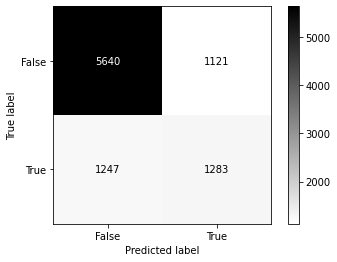

In [34]:
feature_utils.get_prediction_report(flatten(y_test),flatten(y_pred),labels)

In [35]:
imp.reload(model_utils)
conf_threshold = 0.9
err_df,corr_df = model_utils.error_analisys(y_pred,y_pred_proba,y_test,groups_test)
err_df

,seq_idx,idx_in_seq,doc_idx,seq_len,label,pred,pred_proba
0,325.000000,5.000000,18.000000,8.000000,True,False,0.996130
1,325.000000,6.000000,18.000000,8.000000,True,False,0.995223
2,233.000000,3.000000,12.000000,8.000000,False,True,0.995035
3,129.000000,4.000000,5.000000,8.000000,False,True,0.994436
4,129.000000,3.000000,5.000000,8.000000,False,True,0.993519
...,...,...,...,...,...,...,...
2363,777.000000,0.000000,64.000000,8.000000,True,False,0.500634
2364,799.000000,2.000000,64.000000,8.000000,False,True,0.500378
2365,656.000000,6.000000,54.000000,8.000000,False,True,0.500207
2366,84.000000,6.000000,5.000000,8.000000,True,False,0.500194


In [36]:
strong_err = err_df.query("pred_proba > @conf_threshold")
strong_err

,seq_idx,idx_in_seq,doc_idx,seq_len,label,pred,pred_proba
0,325.000000,5.000000,18.000000,8.000000,True,False,0.996130
1,325.000000,6.000000,18.000000,8.000000,True,False,0.995223
2,233.000000,3.000000,12.000000,8.000000,False,True,0.995035
3,129.000000,4.000000,5.000000,8.000000,False,True,0.994436
4,129.000000,3.000000,5.000000,8.000000,False,True,0.993519
...,...,...,...,...,...,...,...
378,981.000000,2.000000,71.000000,8.000000,False,True,0.901214
379,803.000000,1.000000,64.000000,8.000000,True,False,0.900979
380,368.000000,0.000000,29.000000,8.000000,True,False,0.900383
381,1024.000000,0.000000,71.000000,8.000000,True,False,0.900352


In [37]:
strong_corr = corr_df.query("pred_proba > @conf_threshold")
strong_corr

,seq_idx,idx_in_seq,doc_idx,seq_len,label,pred,pred_proba
0,608.000000,3.000000,54.000000,8.000000,False,False,0.999436
1,102.000000,2.000000,5.000000,8.000000,True,True,0.999394
2,669.000000,6.000000,54.000000,8.000000,False,False,0.999367
3,103.000000,3.000000,5.000000,8.000000,True,True,0.999324
4,670.000000,4.000000,54.000000,8.000000,False,False,0.999291
...,...,...,...,...,...,...,...
2714,523.000000,7.000000,36.000000,8.000000,False,False,0.900367
2715,941.000000,3.000000,67.000000,8.000000,False,False,0.900273
2716,398.000000,2.000000,29.000000,8.000000,False,False,0.900252
2717,596.000000,6.000000,50.000000,8.000000,False,False,0.900137


In [38]:
strong_err['doc_idx'].unique()

array([18., 12.,  5., 10., 71., 36., 61., 77., 50., 67., 54., 35., 29.,
       34., 16.,  3., 79., 80., 38., 64.])

In [39]:
strong_corr['doc_idx'].unique()

array([54.,  5., 10., 50., 64., 18., 16., 71., 35., 36., 12., 80., 67.,
       34., 29., 38., 61.,  3., 77., 79.])

In [68]:
def retrive_predicted_sent(pred_df,groups_test,X_test):
    pred_sent_db = pd.DataFrame()
    test_docs = pred_df['doc_idx'].unique()
    for doc_idx in test_docs[:1]:
        doc_samples = pred_df.query("doc_idx == @doc_idx")
        display(doc_samples)
        sent_db =  pd.read_csv(r"./dataframes/{:02d}_sent_db.csv".format(int(doc_idx)))
        for index,row in doc_samples.iterrows():
            print("index {} row [{}][{}]".format(index,row['seq_idx'],row['idx_in_seq']))
            err_sent = X_test[int(row['seq_idx'])][int(row['idx_in_seq'])]
            for i in list (err_sent.keys())[:5]:
                print("{}: {}".format(i,err_sent[i]))
            sent_info = sent_db.query("par_idx_in_doc == @err_sent['par_idx_in_doc'] & sent_idx_in_par == @err_sent['sent_idx_in_par']")
            display(sent_info)
            row['sent_idx'] = sent_info.index.values[0]
             
            pred_sent_db =  pred_sent_db.append(sent_info)
            if index > 1:
                break
    return pred_sent_db
pred_sent_db = retrive_predicted_sent(strong_err,groups_test,X_test)            
pred_sent_db
    

,seq_idx,idx_in_seq,doc_idx,seq_len,label,pred,pred_proba
0,325.000000,5.000000,18.000000,8.000000,True,False,0.996130
1,325.000000,6.000000,18.000000,8.000000,True,False,0.995223
11,328.000000,3.000000,18.000000,8.000000,True,False,0.989196
18,328.000000,4.000000,18.000000,8.000000,True,False,0.988003
38,328.000000,5.000000,18.000000,8.000000,True,False,0.979423
191,335.000000,0.000000,18.000000,8.000000,True,False,0.939717
197,328.000000,6.000000,18.000000,8.000000,True,False,0.938924
229,335.000000,1.000000,18.000000,8.000000,True,False,0.933254
233,331.000000,2.000000,18.000000,8.000000,True,False,0.932500
280,331.000000,1.000000,18.000000,8.000000,True,False,0.919019


index 0 row [325.0][5.0]
par_idx_in_doc: 9.0
sent_len: 64.0
is_client: 1
sent_idx_in_par: 1
TOKEN: 16


,is_question,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_type,block_type,nar_idx,sent_len,is_client,sent_idx_in_par
13,0.000000,עבר עליי שבוע אני חושב אולי אפילו שבועיים פחות...,0.000000,10.000000,1.000000,18.000000,9.000000,9.000000,client,whole,1.000000,64.000000,1,1


index 1 row [325.0][6.0]
par_idx_in_doc: 9.0
sent_len: 75.0
is_client: 1
sent_idx_in_par: 2
TOKEN: 26


,is_question,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_type,block_type,nar_idx,sent_len,is_client,sent_idx_in_par
14,0.000000,אני חושב שזה עוד התחדד כאילו לקראת ה סוף שבוע ...,1.000000,10.000000,1.000000,18.000000,9.000000,9.000000,client,whole,1.000000,75.000000,1,2


index 11 row [328.0][3.0]
par_idx_in_doc: 19.0
sent_len: 161.0
is_client: 1
sent_idx_in_par: 0
TOKEN: 93


,is_question,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_type,block_type,nar_idx,sent_len,is_client,sent_idx_in_par
35,0.000000,ואז מתוך זה עלתה סיטואציה שבה אממ אני לא זוכר...,0.000000,23.000000,1.000000,18.000000,19.000000,19.000000,client,whole,3.000000,161.000000,1,0


,is_question,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_type,block_type,nar_idx,sent_len,is_client,sent_idx_in_par
13,0.000000,עבר עליי שבוע אני חושב אולי אפילו שבועיים פחות...,0.000000,10.000000,1.000000,18.000000,9.000000,9.000000,client,whole,1.000000,64.000000,1,1
14,0.000000,אני חושב שזה עוד התחדד כאילו לקראת ה סוף שבוע ...,1.000000,10.000000,1.000000,18.000000,9.000000,9.000000,client,whole,1.000000,75.000000,1,2
35,0.000000,ואז מתוך זה עלתה סיטואציה שבה אממ אני לא זוכר...,0.000000,23.000000,1.000000,18.000000,19.000000,19.000000,client,whole,3.000000,161.000000,1,0


## Retrive sentenses with error prediction 

In [145]:
imp.reload(defines)
imp.reload(model_utils)
err_pred_info = model_utils.retrive_predicted_sent(strong_err,groups_test,X_test)
err_pred_info.head()

,seq_idx,idx_in_seq,doc_idx,seq_len,label,pred,pred_proba,is_nar,is_client,sent_len,par_idx_in_doc,sent_idx_in_par,is_question,text,TOKEN
0,325.000000,5.000000,18.000000,8.000000,True,False,0.996130,1.000000,1.000000,64.000000,9.000000,1.000000,0.000000,עבר עליי שבוע אני חושב אולי אפילו שבועיים פחות...,16.000000
1,325.000000,6.000000,18.000000,8.000000,True,False,0.995223,1.000000,1.000000,75.000000,9.000000,2.000000,0.000000,אני חושב שזה עוד התחדד כאילו לקראת ה סוף שבוע ...,26.000000
2,233.000000,3.000000,12.000000,8.000000,False,True,0.995035,0.000000,1.000000,11.000000,69.000000,41.000000,0.000000,אבל מתכנת ב,14.000000
3,129.000000,4.000000,5.000000,8.000000,False,True,0.994436,0.000000,1.000000,18.000000,53.000000,28.000000,0.000000,אין אנשים אנשים לא,21.000000
4,129.000000,3.000000,5.000000,8.000000,False,True,0.993519,0.000000,1.000000,30.000000,53.000000,27.000000,0.000000,אז כל הזמן אנשים יהיו איתך ככה,19.000000


## Retrive sentenses with correct prediction 

In [111]:
imp.reload(model_utils)
corr_pred_info = model_utils.retrive_predicted_sent(strong_corr,groups_test,X_test)
corr_pred_info.head()

,seq_idx,idx_in_seq,doc_idx,seq_len,label,pred,pred_proba,is_nar,is_client,sent_len,par_idx_in_doc,sent_idx_in_par,is_question,text,TOKEN
0,608.000000,3.000000,54.000000,8.000000,False,False,0.999436,0.000000,0.000000,14.000000,3.000000,0.000000,1.000000,XXXX מה שלומך?,3.000000
1,102.000000,2.000000,5.000000,8.000000,True,True,0.999394,1.000000,1.000000,54.000000,19.000000,105.000000,0.000000,אז אמרתי לו תשמע בוא נסתכל על מה שהיה פה בפגיש...,10.000000
2,669.000000,6.000000,54.000000,8.000000,False,False,0.999367,0.000000,0.000000,35.000000,191.000000,0.000000,1.000000,מה עם זה שאתה בחור מאוד אינטליגנט?,2.000000
3,103.000000,3.000000,5.000000,8.000000,True,True,0.999324,1.000000,1.000000,61.000000,19.000000,114.000000,1.000000,איך דווקא בפגישה הקודמת פתאום נהיה לך חם וזה נ...,5.000000
4,670.000000,4.000000,54.000000,8.000000,False,False,0.999291,0.000000,0.000000,21.000000,195.000000,0.000000,0.000000,ברור לי שאתה מודע לזה,1.000000


## Merge error and correct sentenses into single df

In [112]:
compare_df = pd.concat([err_pred_info,corr_pred_info],keys=['error','correct'])
compare_df.reset_index(inplace=True)
compare_df.rename(columns={'level_0':'prediction'},inplace=True)
compare_df

,prediction,level_1,seq_idx,idx_in_seq,doc_idx,seq_len,label,pred,pred_proba,is_nar,is_client,sent_len,par_idx_in_doc,sent_idx_in_par,is_question,text,TOKEN
0,error,0,325.000000,5.000000,18.000000,8.000000,True,False,0.996130,1.000000,1.000000,64.000000,9.000000,1.000000,0.000000,עבר עליי שבוע אני חושב אולי אפילו שבועיים פחות...,16.000000
1,error,1,325.000000,6.000000,18.000000,8.000000,True,False,0.995223,1.000000,1.000000,75.000000,9.000000,2.000000,0.000000,אני חושב שזה עוד התחדד כאילו לקראת ה סוף שבוע ...,26.000000
2,error,2,233.000000,3.000000,12.000000,8.000000,False,True,0.995035,0.000000,1.000000,11.000000,69.000000,41.000000,0.000000,אבל מתכנת ב,14.000000
3,error,3,129.000000,4.000000,5.000000,8.000000,False,True,0.994436,0.000000,1.000000,18.000000,53.000000,28.000000,0.000000,אין אנשים אנשים לא,21.000000
4,error,4,129.000000,3.000000,5.000000,8.000000,False,True,0.993519,0.000000,1.000000,30.000000,53.000000,27.000000,0.000000,אז כל הזמן אנשים יהיו איתך ככה,19.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,correct,2714,523.000000,7.000000,36.000000,8.000000,False,False,0.900367,0.000000,0.000000,103.000000,56.000000,0.000000,1.000000,זאת אומרת שאבא בעצם יכול מאוד אה היה להתעצבן א...,84.000000
3098,correct,2715,941.000000,3.000000,67.000000,8.000000,False,False,0.900273,0.000000,1.000000,11.000000,281.000000,2.000000,0.000000,מה זה בושות,8.000000
3099,correct,2716,398.000000,2.000000,29.000000,8.000000,False,False,0.900252,0.000000,1.000000,75.000000,90.000000,8.000000,0.000000,ואז כבר אמרתי לה מה פתאום שאני אשלם עכשיו 3000...,5.000000
3100,correct,2717,596.000000,6.000000,50.000000,8.000000,False,False,0.900137,0.000000,1.000000,24.000000,117.000000,2.000000,0.000000,אבל אה אההממ אבל אהה כן,3.000000


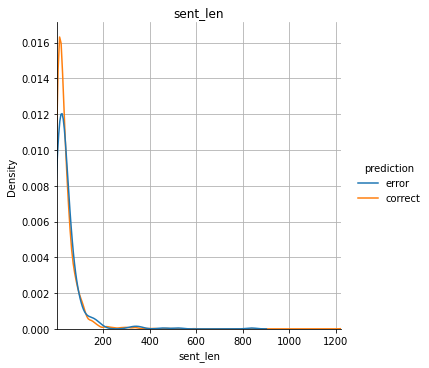

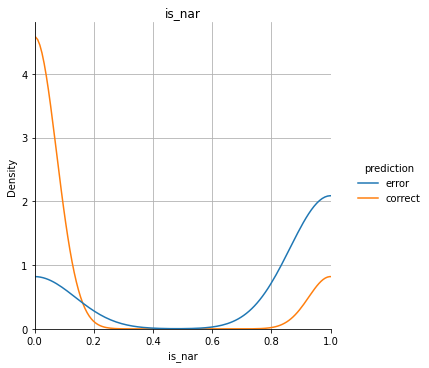

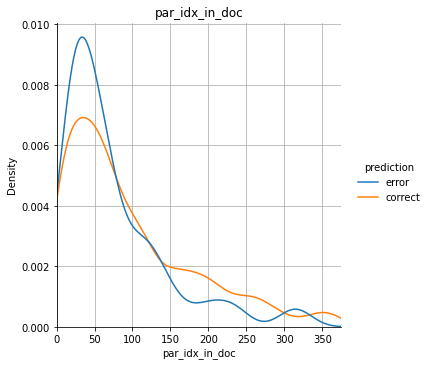

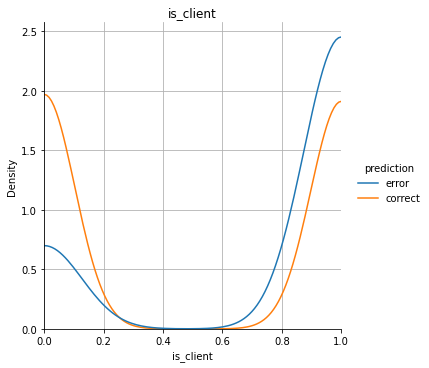

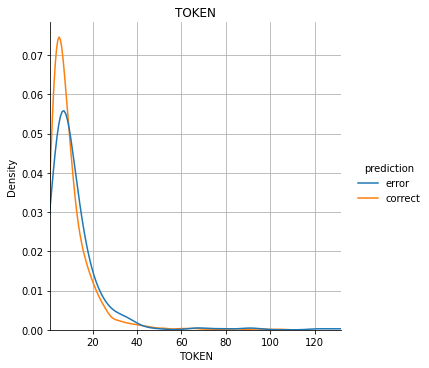

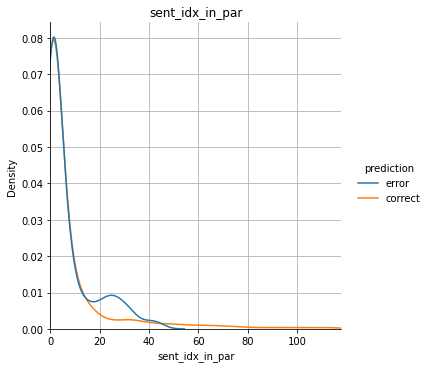

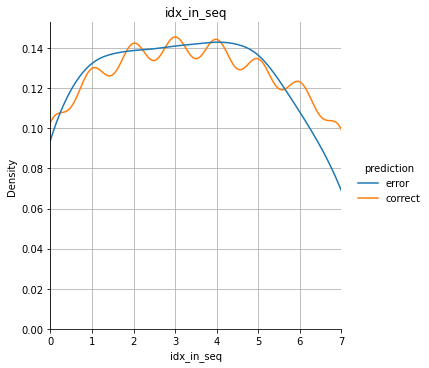

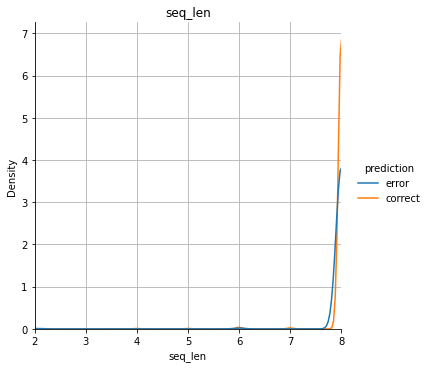

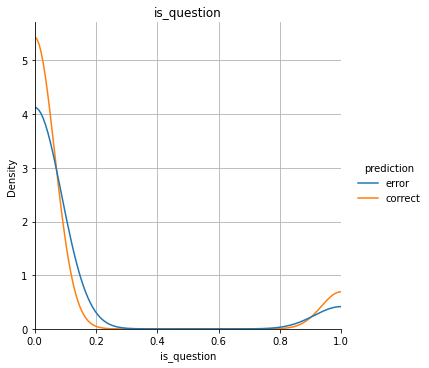

In [113]:
all_columns = set(compare_df.columns)
exclude_columns  = set(['label','pred','prediction','level_1','seq_idx','doc_idx','pred_proba','text'])
include_columns = all_columns-exclude_columns

for i,col in enumerate(include_columns):
    plot =  sns.displot(data=compare_df,
                        x=col,
                       hue = 'prediction',
                        common_norbm=False,
                         kind='kde'
                       )
    plot.set(xlim=(compare_df[col].min(),compare_df[col].max()),title=col)
    plt.grid()

## View error pattern in sequences

### Detect samples with high error ratio per sequence

<AxesSubplot:>

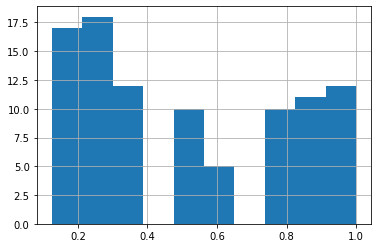

In [162]:
def f(group):
    return pd.DataFrame({'seq_idx': group['seq_idx'],
                         'idx_in_seq': group['idx_in_seq'],
                         'err_ratio': len(group)/group['seq_len']})

grouped=err_pred_info.groupby('seq_idx')
seq_err_ratio = grouped.apply(f)
uniq = seq_err_ratio.drop_duplicates(subset='seq_idx', inplace=False, ignore_index=True)
uniq_sorted = uniq.sort_values(by='err_ratio',ascending=False)
uniq_sorted['err_ratio'].hist()

In [158]:
seq_err_ratio

,seq_idx,idx_in_seq,err_ratio
0,325.000000,5.000000,0.250000
1,325.000000,6.000000,0.250000
2,233.000000,3.000000,1.000000
3,129.000000,4.000000,1.000000
4,129.000000,3.000000,1.000000
...,...,...,...
378,981.000000,2.000000,0.375000
379,803.000000,1.000000,0.250000
380,368.000000,0.000000,0.500000
381,1024.000000,0.000000,1.000000


In [165]:
entire_seq_err = uniq_sorted.query('err_ratio == 1')['seq_idx'].tolist()

In [169]:
err_pred_info.query("seq_idx in @entire_seq_err").sort_values(by=['seq_idx','idx_in_seq'])

,seq_idx,idx_in_seq,doc_idx,seq_len,label,pred,pred_proba,is_nar,is_client,sent_len,par_idx_in_doc,sent_idx_in_par,is_question,text,TOKEN
314,10.000000,0.000000,3.000000,8.000000,False,True,0.911036,0.000000,1.000000,49.000000,27.000000,4.000000,0.000000,אתמול הודיעו לי שעוד שבועיים מתחילה מישהי די חדשה,6.000000
221,10.000000,1.000000,3.000000,8.000000,False,True,0.935332,0.000000,1.000000,32.000000,27.000000,5.000000,0.000000,אבל זה נורא קשה להיכנס לתחום הזה,6.000000
185,10.000000,2.000000,3.000000,8.000000,False,True,0.940915,0.000000,1.000000,23.000000,27.000000,6.000000,0.000000,זאת אומרת אני התחלתי מ0,8.000000
179,10.000000,3.000000,3.000000,8.000000,False,True,0.942661,0.000000,1.000000,14.000000,27.000000,7.000000,0.000000,התחלתי מבדיקות,7.000000
134,10.000000,4.000000,3.000000,8.000000,False,True,0.952017,0.000000,1.000000,54.000000,27.000000,8.000000,0.000000,לאט לאט הכרתי את המערכת איך דברים עובדים מה עו...,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1024.000000,3.000000,71.000000,8.000000,True,False,0.971390,1.000000,1.000000,10.000000,133.000000,0.000000,0.000000,שן קראו לה,7.000000
32,1024.000000,4.000000,71.000000,8.000000,True,False,0.980881,1.000000,0.000000,4.000000,134.000000,0.000000,0.000000,אוקי,11.000000
26,1024.000000,5.000000,71.000000,8.000000,True,False,0.983127,1.000000,0.000000,5.000000,134.000000,1.000000,0.000000,לא כי,6.000000
24,1024.000000,6.000000,71.000000,8.000000,True,False,0.984255,1.000000,0.000000,36.000000,134.000000,2.000000,0.000000,אנחנו תמיד דיברנו על האישה מעיר בארץ,14.000000


## TODO:
1. find what patterns are popular [false-false-true...]
2. try to catch differences between correct & error pattern

In [147]:
def calc_err_ratio(grp):
#     print("grp size {} seq len {}".format(grp.size,set(grp['seq_len'])))
    grp['err_ratio'] = len(grp)/grp['seq_len']
    return grp
 
new_df=err_pred_info.groupby('seq_idx').apply(lambda x: len(x)/x['seq_len'])
new_df
# err_pred_info.groupby("seq_idx").transform(calc_err_ratio)

seq_idx         
10.000000    128   1.000000
             134   1.000000
             142   1.000000
             175   1.000000
             179   1.000000
                     ...   
1078.000000  152   0.250000
1139.000000  321   0.250000
             322   0.250000
1169.000000  199   0.250000
             317   0.250000
Name: seq_len, Length: 383, dtype: float64

In [148]:
err_pred_info

,seq_idx,idx_in_seq,doc_idx,seq_len,label,pred,pred_proba,is_nar,is_client,sent_len,par_idx_in_doc,sent_idx_in_par,is_question,text,TOKEN
0,325.000000,5.000000,18.000000,8.000000,True,False,0.996130,1.000000,1.000000,64.000000,9.000000,1.000000,0.000000,עבר עליי שבוע אני חושב אולי אפילו שבועיים פחות...,16.000000
1,325.000000,6.000000,18.000000,8.000000,True,False,0.995223,1.000000,1.000000,75.000000,9.000000,2.000000,0.000000,אני חושב שזה עוד התחדד כאילו לקראת ה סוף שבוע ...,26.000000
2,233.000000,3.000000,12.000000,8.000000,False,True,0.995035,0.000000,1.000000,11.000000,69.000000,41.000000,0.000000,אבל מתכנת ב,14.000000
3,129.000000,4.000000,5.000000,8.000000,False,True,0.994436,0.000000,1.000000,18.000000,53.000000,28.000000,0.000000,אין אנשים אנשים לא,21.000000
4,129.000000,3.000000,5.000000,8.000000,False,True,0.993519,0.000000,1.000000,30.000000,53.000000,27.000000,0.000000,אז כל הזמן אנשים יהיו איתך ככה,19.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,981.000000,2.000000,71.000000,8.000000,False,True,0.901214,0.000000,1.000000,2.000000,59.000000,21.000000,0.000000,אז,3.000000
379,803.000000,1.000000,64.000000,8.000000,True,False,0.900979,1.000000,1.000000,74.000000,146.000000,5.000000,0.000000,והוא אוהב אותי והוא בוכה כל הזמן היה בוכה מתקש...,15.000000
380,368.000000,0.000000,29.000000,8.000000,True,False,0.900383,1.000000,0.000000,34.000000,43.000000,2.000000,0.000000,זה החלק זה היה כאילו המשך של החלום,17.000000
381,1024.000000,0.000000,71.000000,8.000000,True,False,0.900352,1.000000,1.000000,13.000000,131.000000,5.000000,0.000000,שהיינו רבים ו,10.000000


In [41]:
error_features_df = pd.DataFrame()
keys = ['sent_len','is_client','sent_idx_in_par','par_idx_in_doc','TOKEN']
def add_sent_info(_pred_df):
    pred_df = _pred_df.copy()
    for idx,row in _pred_df.iterrows():
        err_sent = X_test[int(row['seq_idx'])][int(row['idx_in_seq'])]
        for key in keys:
            pred_df.loc[idx,key] =  err_sent[key]
    return pred_df

info_strong_err = add_sent_info(strong_err)
info_strong_err

,seq_idx,idx_in_seq,doc_idx,seq_len,label,pred,pred_proba,sent_len,is_client,sent_idx_in_par,par_idx_in_doc,TOKEN
0,325.000000,5.000000,18.000000,8.000000,True,False,0.996130,64.000000,1.000000,1.000000,9.000000,16.000000
1,325.000000,6.000000,18.000000,8.000000,True,False,0.995223,75.000000,1.000000,2.000000,9.000000,26.000000
2,233.000000,3.000000,12.000000,8.000000,False,True,0.995035,11.000000,1.000000,41.000000,69.000000,14.000000
3,129.000000,4.000000,5.000000,8.000000,False,True,0.994436,18.000000,1.000000,28.000000,53.000000,21.000000
4,129.000000,3.000000,5.000000,8.000000,False,True,0.993519,30.000000,1.000000,27.000000,53.000000,19.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
378,981.000000,2.000000,71.000000,8.000000,False,True,0.901214,2.000000,1.000000,21.000000,59.000000,3.000000
379,803.000000,1.000000,64.000000,8.000000,True,False,0.900979,74.000000,1.000000,5.000000,146.000000,15.000000
380,368.000000,0.000000,29.000000,8.000000,True,False,0.900383,34.000000,0.000000,2.000000,43.000000,17.000000
381,1024.000000,0.000000,71.000000,8.000000,True,False,0.900352,13.000000,1.000000,5.000000,131.000000,10.000000


In [42]:
info_strong_corr = add_sent_info(strong_corr)
info_strong_corr

,seq_idx,idx_in_seq,doc_idx,seq_len,label,pred,pred_proba,sent_len,is_client,sent_idx_in_par,par_idx_in_doc,TOKEN
0,608.000000,3.000000,54.000000,8.000000,False,False,0.999436,14.000000,0.000000,0.000000,3.000000,3.000000
1,102.000000,2.000000,5.000000,8.000000,True,True,0.999394,54.000000,1.000000,105.000000,19.000000,10.000000
2,669.000000,6.000000,54.000000,8.000000,False,False,0.999367,35.000000,0.000000,0.000000,191.000000,2.000000
3,103.000000,3.000000,5.000000,8.000000,True,True,0.999324,61.000000,1.000000,114.000000,19.000000,5.000000
4,670.000000,4.000000,54.000000,8.000000,False,False,0.999291,21.000000,0.000000,0.000000,195.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2714,523.000000,7.000000,36.000000,8.000000,False,False,0.900367,103.000000,0.000000,0.000000,56.000000,84.000000
2715,941.000000,3.000000,67.000000,8.000000,False,False,0.900273,11.000000,1.000000,2.000000,281.000000,8.000000
2716,398.000000,2.000000,29.000000,8.000000,False,False,0.900252,75.000000,1.000000,8.000000,90.000000,5.000000
2717,596.000000,6.000000,50.000000,8.000000,False,False,0.900137,24.000000,1.000000,2.000000,117.000000,3.000000


In [43]:
compare_df = pd.concat([info_strong_err,info_strong_corr],keys=['error','correct'])
compare_df.reset_index(inplace=True)
compare_df.rename(columns={'level_0':'prediction'},inplace=True)
compare_df

,prediction,level_1,seq_idx,idx_in_seq,doc_idx,seq_len,label,pred,pred_proba,sent_len,is_client,sent_idx_in_par,par_idx_in_doc,TOKEN
0,error,0,325.000000,5.000000,18.000000,8.000000,True,False,0.996130,64.000000,1.000000,1.000000,9.000000,16.000000
1,error,1,325.000000,6.000000,18.000000,8.000000,True,False,0.995223,75.000000,1.000000,2.000000,9.000000,26.000000
2,error,2,233.000000,3.000000,12.000000,8.000000,False,True,0.995035,11.000000,1.000000,41.000000,69.000000,14.000000
3,error,3,129.000000,4.000000,5.000000,8.000000,False,True,0.994436,18.000000,1.000000,28.000000,53.000000,21.000000
4,error,4,129.000000,3.000000,5.000000,8.000000,False,True,0.993519,30.000000,1.000000,27.000000,53.000000,19.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,correct,2714,523.000000,7.000000,36.000000,8.000000,False,False,0.900367,103.000000,0.000000,0.000000,56.000000,84.000000
3098,correct,2715,941.000000,3.000000,67.000000,8.000000,False,False,0.900273,11.000000,1.000000,2.000000,281.000000,8.000000
3099,correct,2716,398.000000,2.000000,29.000000,8.000000,False,False,0.900252,75.000000,1.000000,8.000000,90.000000,5.000000
3100,correct,2717,596.000000,6.000000,50.000000,8.000000,False,False,0.900137,24.000000,1.000000,2.000000,117.000000,3.000000


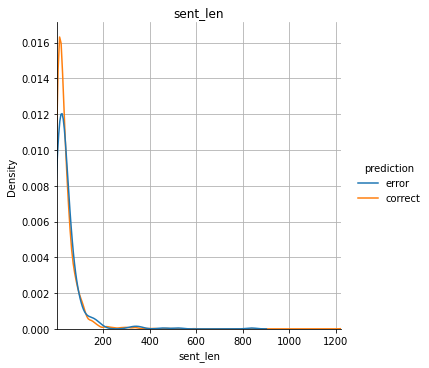

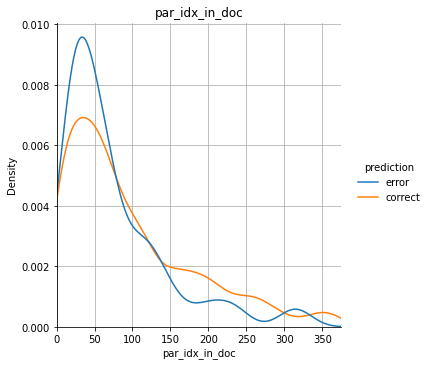

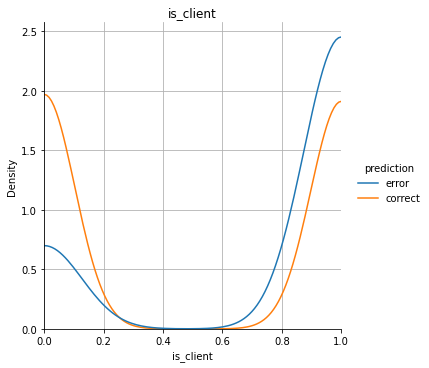

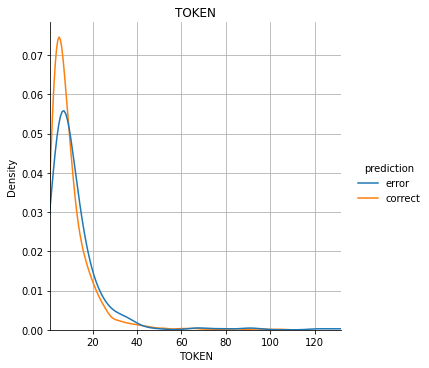

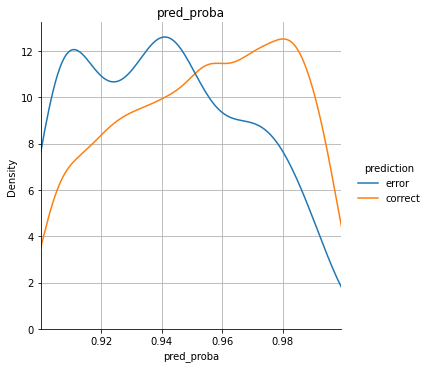

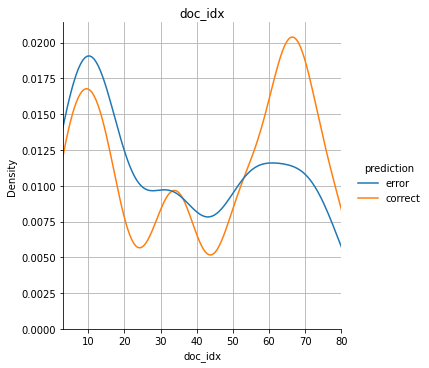

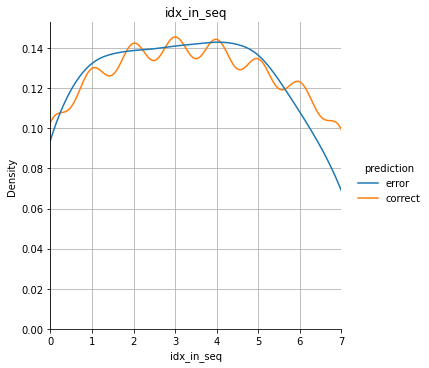

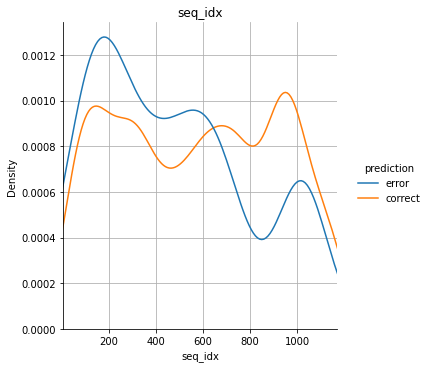

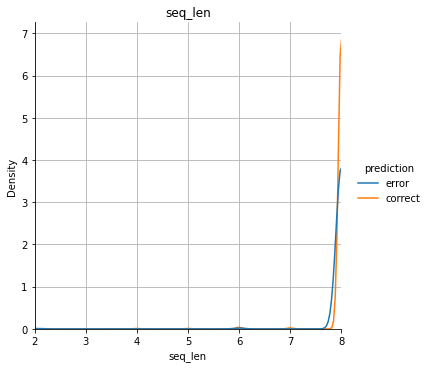

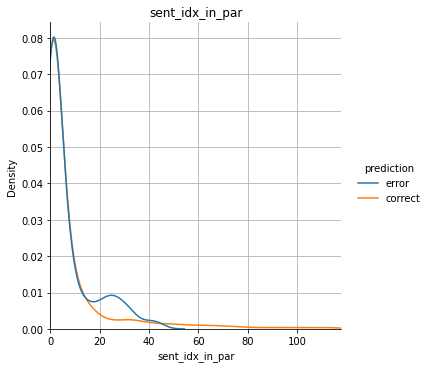

In [67]:
all_columns = set(compare_df.columns)
exclude_columns  = set(['label','pred','prediction','level_1'])
include_columns = all_columns-exclude_columns

for i,col in enumerate(include_columns):
    plot =  sns.displot(data=compare_df,
                        x=col,
                       hue = 'prediction',
                        common_norm=False,
                         kind='kde'
                       )
    plot.set(xlim=(compare_df[col].min(),compare_df[col].max()),title=col)
    plt.grid()

In [148]:
docs_map_sent = feature_utils.pack_all_doc_sentences_to_map(per_par=False,limit=0,sent_lemma_db_list=[])

4 doc 460 sentences packed
11 doc 209 sentences packed
30 doc 356 sentences packed
25 doc 355 sentences packed
58 doc 269 sentences packed
72 doc 501 sentences packed
67 doc 264 sentences packed
46 doc 264 sentences packed
53 doc 369 sentences packed
79 doc 221 sentences packed
40 doc 221 sentences packed
55 doc 199 sentences packed
74 doc 400 sentences packed
61 doc 533 sentences packed
9 doc 204 sentences packed
36 doc 158 sentences packed
23 doc 294 sentences packed
2 doc 298 sentences packed
17 doc 170 sentences packed
28 doc 252 sentences packed
80 doc 395 sentences packed
31 doc 336 sentences packed
24 doc 317 sentences packed
5 doc 510 sentences packed
10 doc 400 sentences packed
78 doc 178 sentences packed
47 doc 204 sentences packed
52 doc 571 sentences packed
73 doc 395 sentences packed
66 doc 356 sentences packed
59 doc 344 sentences packed
75 doc 317 sentences packed
60 doc 170 sentences packed
41 doc 208 sentences packed
54 doc 505 sentences packed
29 doc 497 sentences pac

In [157]:
imp.reload(feature_utils)
feature_utils.reshape_docs_map_to_seq(docs_map_sent,per_par=False,seq_len=8,step=8)

doc sentences reshaped: from 460 to 58
doc sentences reshaped: from 209 to 27
doc sentences reshaped: from 356 to 45
doc sentences reshaped: from 355 to 45
doc sentences reshaped: from 269 to 34
doc sentences reshaped: from 501 to 63
doc sentences reshaped: from 264 to 33
doc sentences reshaped: from 264 to 33
doc sentences reshaped: from 369 to 47
doc sentences reshaped: from 221 to 28
doc sentences reshaped: from 221 to 28
doc sentences reshaped: from 199 to 25
doc sentences reshaped: from 400 to 50
doc sentences reshaped: from 533 to 67
doc sentences reshaped: from 204 to 26
doc sentences reshaped: from 158 to 20
doc sentences reshaped: from 294 to 37
doc sentences reshaped: from 298 to 38
doc sentences reshaped: from 170 to 22
doc sentences reshaped: from 252 to 32
doc sentences reshaped: from 395 to 50
doc sentences reshaped: from 336 to 42
doc sentences reshaped: from 317 to 40
doc sentences reshaped: from 510 to 64
doc sentences reshaped: from 400 to 50
doc sentences reshaped: f

In [158]:
test_percent = 0.25
X_train,y_train,X_test,y_test,test_idx,groups_train,groups_test =  split_test_train_docs(docs_map_sent,test_percent)

In [159]:
X_test[3]

[{'par_idx_in_doc': 12.0,
  'sent_len': 73.0,
  'is_client': 1,
  'sent_idx_in_par': 9,
  'TOKEN': 14,
  'POSTAG_DEF': 0.3571428571428571,
  'POSTAG_DTT': 0.0714285714285714,
  'POSTAG_EX': 0.0714285714285714,
  'POSTAG_JJ': 0.0714285714285714,
  'POSTAG_NN': 0.3571428571428571,
  'POSTAG_PREPOSITION': 0.2142857142857142,
  'POSTAG_PRP': 0.0714285714285714,
  'POSTAG_RB': 0.2857142857142857,
  'POSTAG_VB': 0.0714285714285714,
  'f_gen_M': 0.5714285714285714,
  'f_num_P': 0.0714285714285714,
  'f_num_S': 0.5,
  'f_per_3': 0.1428571428571428,
  'f_tense_PAST': 0.0714285714285714,
  '-1:par_idx_in_doc': 12.0,
  '-1:sent_len': 23.0,
  '-1:is_client': 1,
  '-1:sent_idx_in_par': 8,
  '-1:TOKEN': 17,
  '-1:POSTAG_AT': 0.1764705882352941,
  '-1:POSTAG_BN': 0.0588235294117647,
  '-1:POSTAG_CONJ': 0.0588235294117647,
  '-1:POSTAG_COP': 0.0588235294117647,
  '-1:POSTAG_DEF': 0.2352941176470588,
  '-1:POSTAG_DTT': 0.1176470588235294,
  '-1:POSTAG_IN': 0.0588235294117647,
  '-1:POSTAG_MD': 0.058823

In [161]:
crf = CRF(
    min_freq = 5,
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True,
    )
crf.fit(X_train, y_train)
y_pred  =  crf.predict(X_test)
labels = list(crf.classes_)
f1 = metrics.flat_f1_score(y_test, y_pred,average='weighted', labels=labels)
recall = metrics.flat_recall_score(y_test, y_pred,average='weighted', labels=labels)
precision = metrics.flat_precision_score(y_test, y_pred,average='weighted', labels=labels)
print ("f1 {}\nrecall {}\nprecition {}".format(f1,recall,precision))

f1 0.6729220706295359
recall 0.6831739688882547
precition 0.6739692164055393


In [162]:
score =  manual_groups_validate(docs_map_sent,test_percent,num_splits=10)
feature_utils.add_score_to_db(score_db_man,"3_3_man_sent",score)

mean_values [0.66178622 0.67936115 0.65885534]


,f1,recall,precision
3_3_man,0.685599,0.693561,0.684028
3_3_man_sent,0.661786,0.679361,0.658855


In [ ]:
score_db_man

In [72]:
mer_db =   pd.read_csv(r"./dataframes/{:02d}_merged_db.csv".format(int(groups_test[0])))
mer_db.head()

,is_nar,par_idx_in_doc,sent_len,is_client,sent_idx_in_par,TOKEN,POSTAG_ADVERB,POSTAG_AT,POSTAG_BN,POSTAG_BNT,...,f_suf_per_2.0,f_suf_per_3.0,f_per_1,f_per_2,f_per_3,f_per_A,f_tense_BEINONI,f_tense_FUTURE,f_tense_IMPERATIVE,f_tense_PAST
0,0.000000,0.000000,14.000000,1,0,1,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,0.000000,1.000000,5.000000,0,0,2,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,2.000000,22.000000,1,0,2,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,4.000000,22.000000,1,0,1,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,6.000000,9.000000,1,0,3,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000


In [67]:
for i,row in enumerate(X_test):
    for j,item in enumerate(row):
        if not 'is_client' in item:
            print("No client tag in X_test[{}][{}]".format(i,j))


No client tag in X_test[0][1]
No client tag in X_test[1][2]
No client tag in X_test[2][1]
No client tag in X_test[3][0]
No client tag in X_test[4][3]
No client tag in X_test[5][1]
No client tag in X_test[6][0]
No client tag in X_test[8][3]
No client tag in X_test[9][0]
No client tag in X_test[10][1]
No client tag in X_test[11][0]
No client tag in X_test[12][2]
No client tag in X_test[13][3]
No client tag in X_test[14][0]
No client tag in X_test[15][1]
No client tag in X_test[16][0]
No client tag in X_test[17][1]
No client tag in X_test[18][2]
No client tag in X_test[19][0]
No client tag in X_test[20][2]
No client tag in X_test[21][0]
No client tag in X_test[22][3]
No client tag in X_test[23][0]
No client tag in X_test[24][1]
No client tag in X_test[25][0]
No client tag in X_test[26][0]
No client tag in X_test[27][4]
No client tag in X_test[29][3]
No client tag in X_test[30][1]
No client tag in X_test[31][0]
No client tag in X_test[32][1]
No client tag in X_test[33][0]
No client tag in 

In [38]:
for index,row in pred_sent_db.iterrows():
    display(row.transpose())
    break


is_question                                                   0.000000
text                 ההכאה שחזרתי אליו זאת אומרת מה שעשיתי זה מה שה...
sent_idx_in_block                                             1.000000
block_idx                                                   225.000000
is_nar                                                        1.000000
doc_idx                                                      14.000000
par_db_idx                                                  214.000000
par_idx_in_doc                                              214.000000
par_type                                                        client
block_type                                                      middle
nar_idx                                                      10.000000
sent_len                                                     70.000000
is_client                                                            1
sent_idx_in_par                                                      1
Name: 

In [286]:
len(groups_test), len(y_test)

(1416, 1416)

# TODO
[] retrive all strong wrong  / strong correct sentences
[] check the difference

In [287]:
groups_test[int(err_df.loc[0,'seq_idx'])]

73

In [291]:
test_doc_idx = groups_test[int(err_df.loc[0,'seq_idx'])]
print ("Test doc idx = {}".format(test_doc_idx))
sent_db =  pd.read_csv(r"./dataframes/{:02d}_sent_db.csv".format(test_doc_idx))

Test doc idx = 73


In [293]:
sent_db.query("par_idx_in_doc == @error_sent['par_idx_in_doc'] and sent_idx_in_par == @error_sent['sent_idx_in_par']")

,is_question,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_type,block_type,nar_idx,sent_len,is_client,sent_idx_in_par
233,0.000000,אני כן חושב שחברה,14.000000,49.000000,1.000000,73.000000,43.000000,43.000000,therapist,start,6.000000,17.000000,0,15


In [239]:
test_idx

{1, 2, 5, 6, 11, 16, 22, 26, 37, 41, 49, 50, 55, 56, 57, 59, 63, 67, 69, 75}

In [222]:
len(y_pred),len(flatten(y_pred))

(1551, 10194)

In [219]:
len(X_test)

1551

### Cross-validate

In [97]:
score_db = pd.DataFrame()

In [111]:
imp.reload(feature_utils)
shapes = [(3,3), # sequence [1:3][4:6]...
          (3,2), # sequence [1:3][3:7]...
          (3,1)] # sequence [1:3][2:4][3:5]...
n_groups = 80 # len(set(groups_plane))
test_percent = 0.40
norm = 1
normed = "norm" if norm else ""
prefix = "no_limit"
n_splits = int(n_groups*test_percent)
n_out = int(n_groups/n_splits)
if n_out == 1:
    logo = LeaveOneGroupOut()
else:
#     logo = LeavePGroupsOut(n_groups=num_out)
    logo = GroupKFold(n_splits=n_splits)
#     print(logo.get_n_splits(X_plane,y_plane,groups_plane))

for shape in shapes[1:2]:
    seq_len = shape[0]
    step = shape[1]
#     X_shaped,y_shaped,groups_shaped = feature_utils.reshape_doc_paragraphs_to_sequence(X_plane,y_plane,groups_plane,seq_len,step)
#     X_shaped,y_shaped,groups_shaped = feature_utils.reshape_docs_map_to_seq(docs_map,seq_len,step)
    score = feature_utils.leave_out_validate(X_shaped,y_shaped,groups_shaped,logo)
    feature_utils.add_score_to_db(score_db,"{}_len{}_step{}_{}".format(prefix,seq_len,step,normed),score)

True labels 0.33 of train, 0.24 of test
True labels 0.32 of train, 0.35 of test
True labels 0.32 of train, 0.25 of test
True labels 0.33 of train, 0.07 of test
True labels 0.32 of train, 0.42 of test
True labels 0.33 of train, 0.23 of test
True labels 0.33 of train, 0.10 of test


KeyboardInterrupt: 

In [103]:
score_db

,f1,recall,precision
no_tf_len3_step2_norm,0.673553,0.685626,0.687427


In [105]:
score_db.to_csv("./dataframes/score_max_len8.csv",index=False)